** Machine learning approach to model antidote against snake venom - [Part 5] - Regression Model with Random Forest Algorithm**
In this Jupyter notebook, we are building a machine learning model using the ChEMBL bioactivity data to predict the bioactivity of compounds against snake venom.

In Part 5, we will be comparing several ML algorithms for build regression models of phospholipase A2 inhibitors.



## **1. Import libraries**

In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [ ]:
! wget https://github.com/Ankeet-Ak/biotechnologybtechproject/blob/main/Phospholipase_A2_bioactivity_data_3class_pubchem_fp_pIC50.csv

--2022-11-21 14:37:30--  https://github.com/Ankeet-Ak/biotechnologybtechproject/blob/main/Phospholipase_A2_bioactivity_data_3class_pubchem_fp_pIC50.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Phospholipase_A2_bioactivity_data_3class_pubchem_fp_pIC50.csv’

Phospholipase_A2_bi     [ <=>                ] 138.16K  --.-KB/s    in 0.03s   

2022-11-21 14:37:30 (5.19 MB/s) - ‘Phospholipase_A2_bioactivity_data_3class_pubchem_fp_pIC50.csv’ saved [141472]



In [ ]:
df = pd.read_csv('Phospholipase_A2_bioactivity_data_3class_pubchem_fp_pIC50.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(600, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(600, 124)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 90%|█████████ | 38/42 [00:14<00:01,  3.17it/s]

[14:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:15<00:00,  2.72it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 90%|█████████ | 38/42 [00:13<00:01,  2.82it/s]

[14:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:14<00:00,  2.94it/s]


In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.73,0.80,0.59,0.64
DecisionTreeRegressor,0.73,0.80,0.59,0.03
ExtraTreeRegressor,0.73,0.80,0.59,0.03
GaussianProcessRegressor,0.73,0.80,0.59,0.14
RandomForestRegressor,0.68,0.76,0.65,0.51
BaggingRegressor,0.66,0.75,0.67,0.08
MLPRegressor,0.62,0.72,0.70,1.35
LGBMRegressor,0.60,0.70,0.72,0.12
HistGradientBoostingRegressor,0.60,0.70,0.72,0.76


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RANSACRegressor,6183797152974241884274688.00,-259823409788833700511744.00,721846269089.49,0.51
Lars,707095019364560905699328.00,-29709874763216845799424.00,244093372441.29,0.07
LinearRegression,255174301385469879910400.00,-10721609301910498574336.00,146634298503.13,0.03
TransformedTargetRegressor,255174301385469879910400.00,-10721609301910498574336.00,146634298503.13,0.03
KernelRidge,416.32,-16.45,5.92,0.04
GaussianProcessRegressor,135.38,-4.65,3.37,0.10
QuantileRegressor,24.95,-0.01,1.42,3.20
LassoLars,24.84,-0.00,1.42,0.02
Lasso,24.84,-0.00,1.42,0.03


## **5. Data visualization of model performance**

[(0.0, 1.0)]

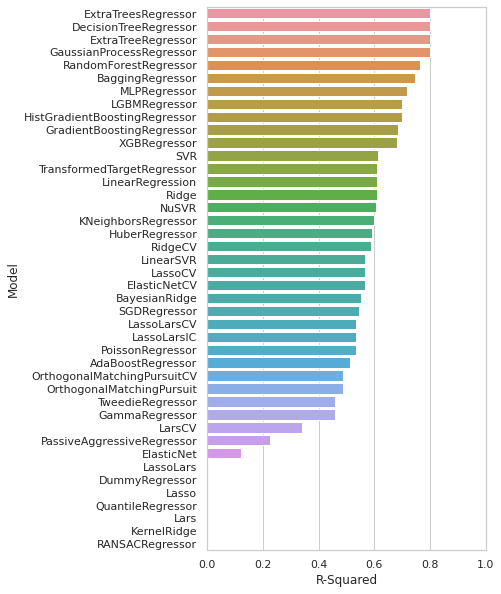

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

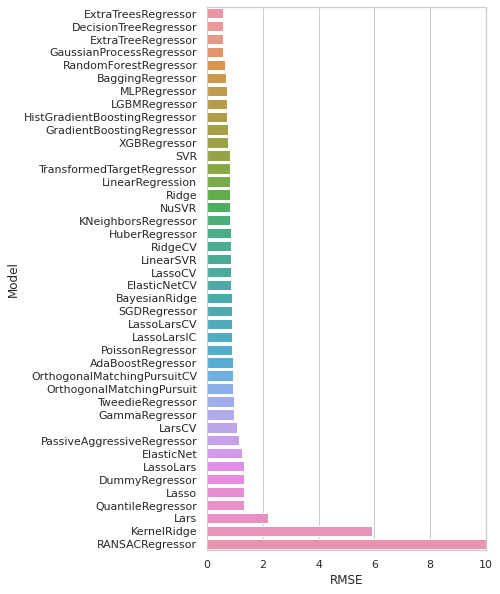

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

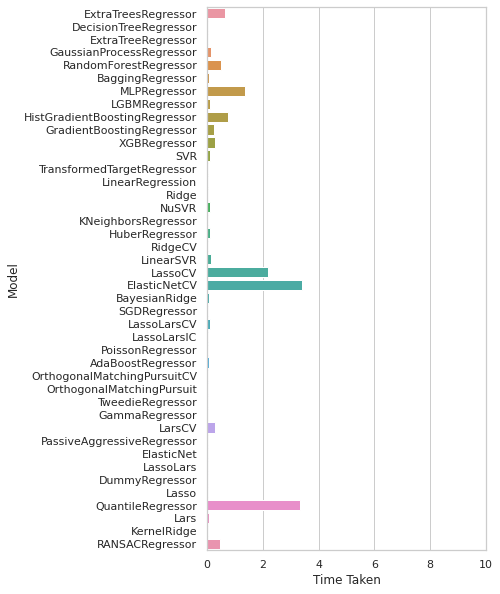

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))